In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Homework 1 

### Question 1

Gamma校正是一种用于调整数字图像亮度的重要技术，特别是当图像准备在不同的设备上显示时。给定一个图像$I$，Gamma校正后的图像$I'$可以通过下面的公式计算：

\begin{equation}
I' = I^\gamma
\end{equation}

其中，$\gamma$（Gamma值）是校正系数。当$\gamma < 1$时，图像的亮度会增加，反之亮度会降低。实际应用中，$\gamma$值通常是根据显示设备的特性和输出媒介的要求来确定的。


用类似 $g = (constant\times I)\gamma$ 的公式来表示灰度和光强度间的关系，则称为$\gamma$校正。I 为图像


In [21]:
def gamma_correction(image, gamma):
    table = (np.arange(0, 256) / 255.0) ** gamma * 255
    table = np.array(table, np.uint8)
    return cv2.LUT((image * 255).astype(np.uint8), table) / 255

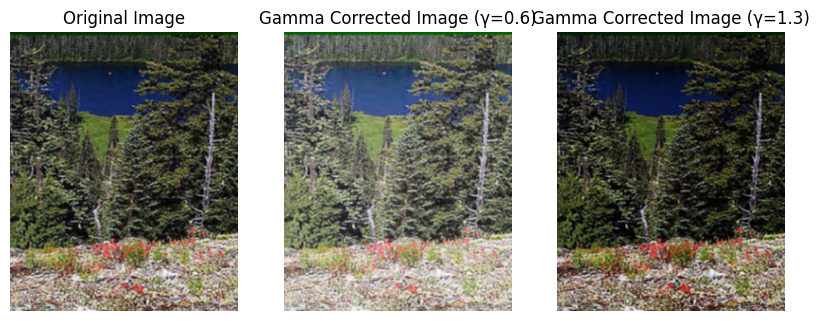

In [45]:
# read image from data directory
img1_path = './data/t1.png'

img1 = cv2.imread(img1_path).astype(np.float32) / 255
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Apply gamma correction with gamma=0.6
img1_op = gamma_correction(img1, 0.6)
# Apply gamma correction with gamma=1.3
img1_op2 = gamma_correction(img1, 1.3)

# Plotting the original and gamma-corrected images side by side
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Display original image
ax[0].imshow(img1)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Display gamma-corrected image
ax[1].imshow(img1_op)
ax[1].set_title("Gamma Corrected Image (γ=0.6)")
ax[1].axis('off')

ax[2].imshow(img1_op2)
ax[2].set_title("Gamma Corrected Image (γ=1.3)")
ax[2].axis('off')

plt.show()

规范化是数字图像处理中常用的一种技术，目的是将图像的像素值线性缩放到标准化的范围，通常是0到255。这对于8位的图像处理尤其重要，因为它允许图像数据适应不同的显示设备和分析工具。

这个过程通过以下公式实现：

$$
I' = \frac{(I - f_{\text{min}}) \times 255}{f_{\text{max}} - f_{\text{min}}}
$$

其中\( I \)是原始图像，\( I' \)是规范化后的图像，\( f_{\text{min}} \)和\( f_{\text{max}} \)分别是原始图像中的最小和最大像素值。通过规范化，图像的对比度得到增强，细节和特征变得更加明显。

In [52]:
def normalize_image(image):
    f_min, f_max = image.min(), image.max()
    # Perform the linear scaling to the range [0, 255]
    return ((image - f_min) / (f_max - f_min) * 255).astype(np.uint8)

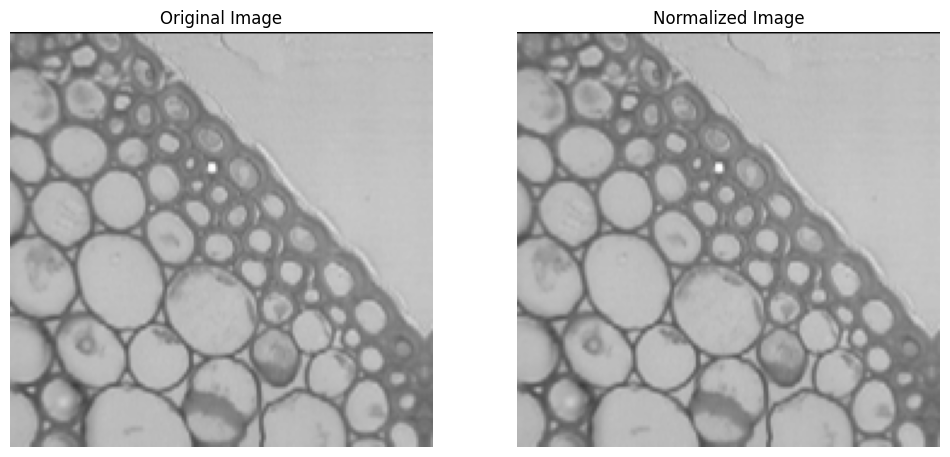

In [53]:
img2_path = './data/t2.png'

img2 = cv2.imread(img2_path)

normalized_img = normalize_image(img2)

# Convert to RGB for display purposes
if len(normalized_img.shape) == 3 and normalized_img.shape[2] == 3:
    normalized_img = cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB)

# Display the original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img2, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(normalized_img, cmap='gray')
axes[1].set_title('Normalized Image')
axes[1].axis('off')

plt.show()

### Question 3
直方图均衡是一种图像处理技术，用于改善图像的对比度。这种方法通过调整图像的直方图分布，使得整个直方图更加均匀，从而增加图像的全局对比度。特别在图像的背景和前景都太亮或太暗时，直方图均衡能有效地增强局部对比度，使得细节更加清晰。

直方图均衡工作原理是重新映射图像中的像素值，使得直方图的累积分布函数（CDF）成为近似线性，这样会将原来的直方图分布拉伸，允许像素值分布在更广泛的范围内。结果就是图像的亮度可以更好地分布在可用的亮度范围内，这通常会导致图像看起来更加清晰和对比度更高。

In [57]:
def plot_image_and_hist(image, title, ax_img, ax_hist):
    ax_img.imshow(image, cmap='gray')
    ax_img.set_title(title)
    ax_img.axis('off')
    
    # Calculate and plot the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax_hist.plot(hist)
    ax_hist.set_xlim([0, 256])
    ax_hist.set_yticks([])
    ax_hist.set_title('Histogram')

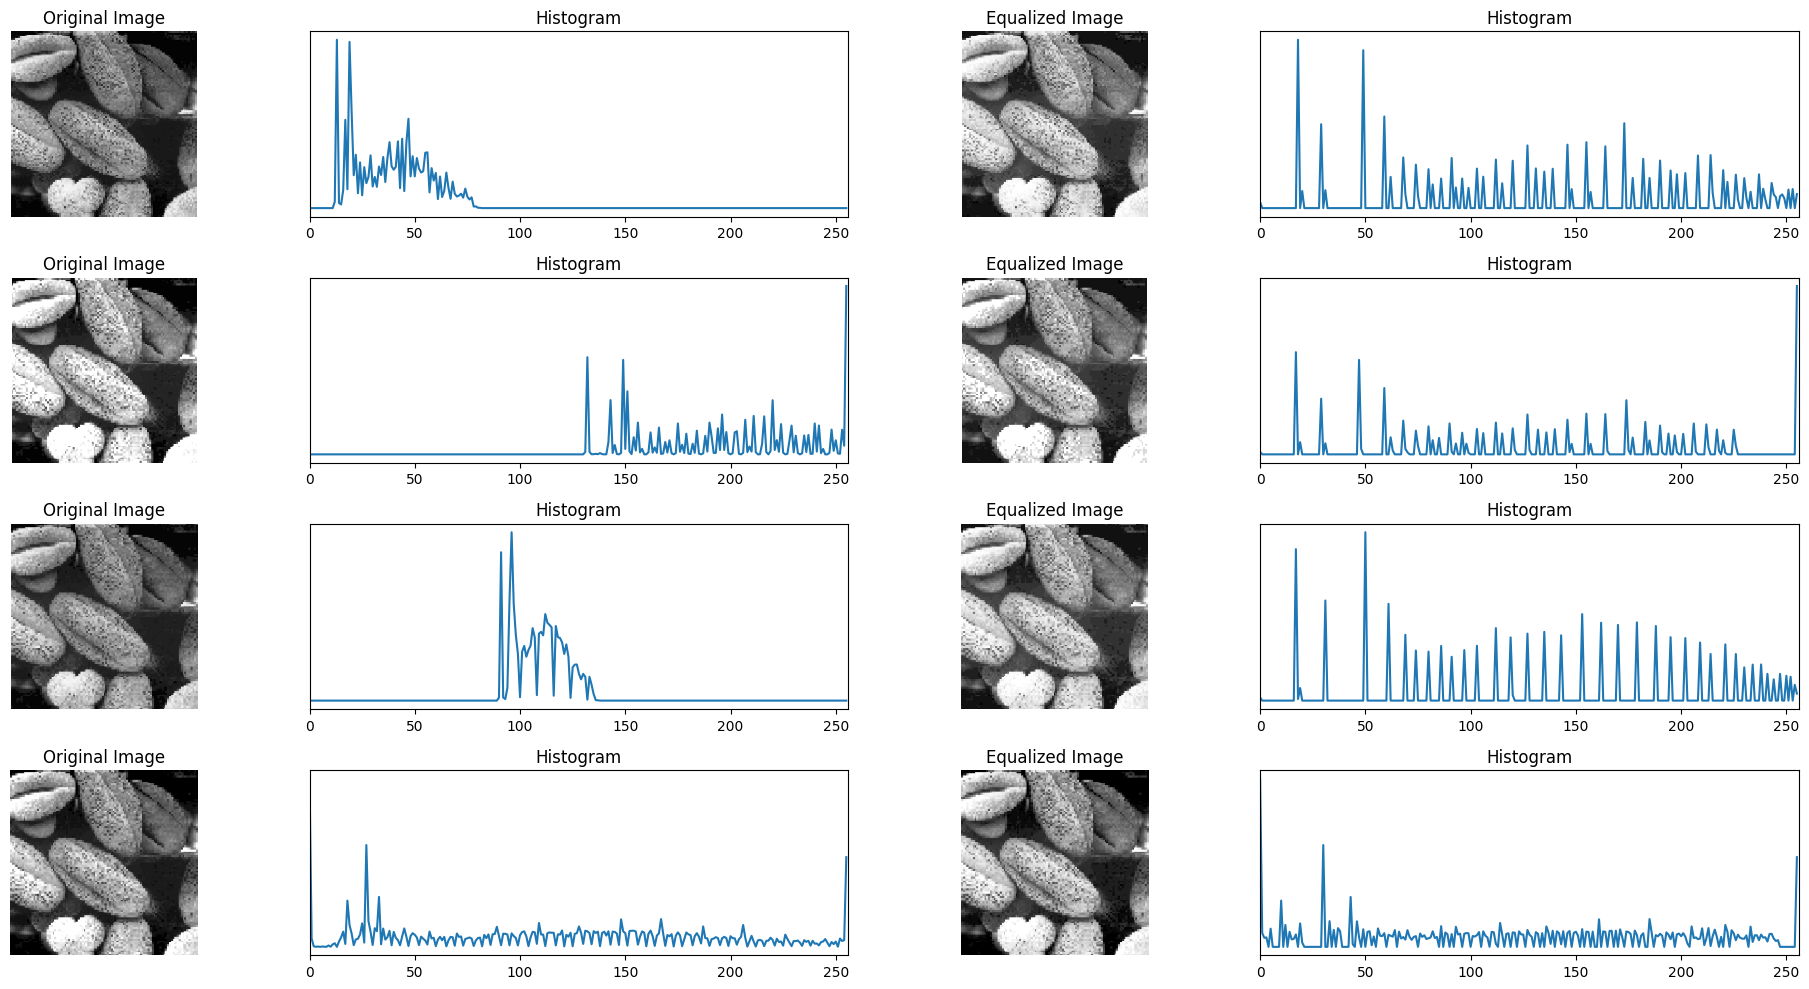

In [58]:
# Create subplots in a 4x4 grid layout
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

img3_1_path = './data/t3-1.png'
img3_2_path = './data/t3-2.png'
img3_3_path = './data/t3-3.png'
img3_4_path = './data/t3-4.png'
img3_1 = cv2.imread(img3_1_path, cv2.IMREAD_GRAYSCALE)
img3_2 = cv2.imread(img3_2_path, cv2.IMREAD_GRAYSCALE)
img3_3 = cv2.imread(img3_3_path, cv2.IMREAD_GRAYSCALE)
img3_4 = cv2.imread(img3_4_path, cv2.IMREAD_GRAYSCALE)

img3_1_eq = cv2.equalizeHist(img3_1)
img3_2_eq = cv2.equalizeHist(img3_2)
img3_3_eq = cv2.equalizeHist(img3_3)
img3_4_eq = cv2.equalizeHist(img3_4)

hist1_1, bins1_1 = np.histogram(img3_1.flatten(), 256, [0,256])
hist1_2, bins1_2 = np.histogram(img3_1_eq.flatten(), 256, [0,256])

# Plot for img3_1
plot_image_and_hist(img3_1, 'Original Image', axes[0, 0], axes[0, 1])
plot_image_and_hist(img3_1_eq, 'Equalized Image', axes[0, 2], axes[0, 3])

# Plot for img3_2
plot_image_and_hist(img3_2, 'Original Image', axes[1, 0], axes[1, 1])
plot_image_and_hist(img3_2_eq, 'Equalized Image', axes[1, 2], axes[1, 3])

# Plot for img3_3
plot_image_and_hist(img3_3, 'Original Image', axes[2, 0], axes[2, 1])
plot_image_and_hist(img3_3_eq, 'Equalized Image', axes[2, 2], axes[2, 3])

# Plot for img3_4
plot_image_and_hist(img3_4, 'Original Image', axes[3, 0], axes[3, 1])
plot_image_and_hist(img3_4_eq, 'Equalized Image', axes[3, 2], axes[3, 3])

plt.tight_layout()
plt.show()